# Netflix Movie Analysis 1990s

---

**Author:** Emmanuel Ocran

**LinkedIn:** [@emmanuel-ocran](https://www.linkedin.com/in/emmanuel-ocran)

**GitHub:** [@mrocran](https://github.com/mrocran) 

---

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further!

## The data
### **netflix_data.csv**
| Column       | Description |
|--------      |-------------|
| `show_id`    | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Objectives
- To analyze movie duration trends in the 1990s.

- To examine the popularity of genres and prolific directors.

- To identify top movie-producing countries and their production trends.

- To investigate whether movie durations changed over time.



## Research Questions
- What was the most frequent movie duration in the 1990s?

- How many action movies in the 1990s had a duration of less than 90 minutes?

- What were the most popular genres and who were the most prolific directors?

- Which countries produced the most movies during this period?

- Did movie durations increase or decrease over time?

## 0. Importing Necessary Libraries
We'll start by importing the essential Python libraries for data analysis and visualization.


In [1]:
# Data analysis
import pandas as pd  

# Data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 


## 1. Loading the Dataset  
We will use `pandas` to load the `netflix_data.csv` file and take an initial look at the data.  

In [2]:
# Load the dataset
netflix_data = pd.read_csv("ads-datasets/netflix_data.csv")

# Display basic information about the dataset
netflix_data.info()

# Show the first few rows
netflix_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


#### Understanding the Dataset  

From the dataset preview, we can make the following observations:

- The dataset contains **4,812 rows and 11 columns**, as shown in the `info()` output.

- Key columns include:

 - `type` (Movie/TV Show)

 - `release_year` (Year of release)

 - `duration` (Length of movies in minutes)

 - `genre`, `country`, and `director` (Categorical variables)

- **No missing values** are present, and all columns are correctly formatted.

Since the dataset is clean, we can proceed with **Exploratory Data Analysis (EDA)** to uncover patterns and insights.

## 2:  Exploring the Data

### 2.1 Summary Statistics


In [3]:
# Generate summary statistics for numerical columns
netflix_data.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


#### Summary Statistics Overview

- **Release Year**: Movies range from **1942 to 2021**, with most released after 2010 (median: **2016**).

- **Duration**: The average movie lasts **~99 minutes**, with most between **88-116 minutes**.

- **Outliers**: Some extremely short (**1 min**) and long (**253 min**) movies exist.

- This suggests that the dataset is **skewed towards recent movies** and has some **variation in movie lengths**.

Now, let's visualize the duration distribution for deeper insights.

### 2.2 Visualizing the Distribution

#### 2.2.1 Histogram for `release_year`

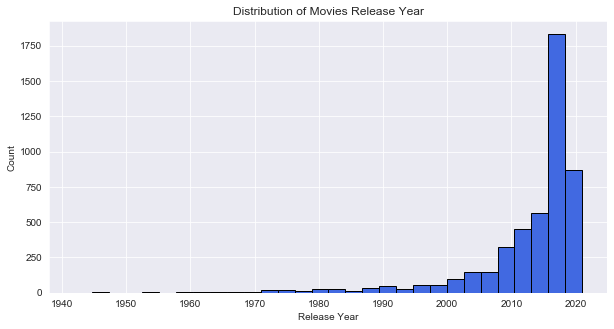

In [4]:
# Set the style
sns.set_style("darkgrid")

# Figure size
plt.figure(figsize=(10, 5))

# Histogram of release year
plt.hist(netflix_data["release_year"], bins=30, color="royalblue", edgecolor="black")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Distribution of Movies Release Year")

# Show plot
plt.show()


#### Interpretion:

- **Most movies** were released after **2000**, with a sharp rise post-2010, likely due to Netflix’s expansion and streaming growth.

- **Peak releases** releases occurred in the late **2010s and early 2020s**, reflecting increased production.

- **Older movies (pre-1990)** are scarce, Netflix’s catalog selection rather than actual industry production trends.

#### 2.2.2 Histogram for `duration`

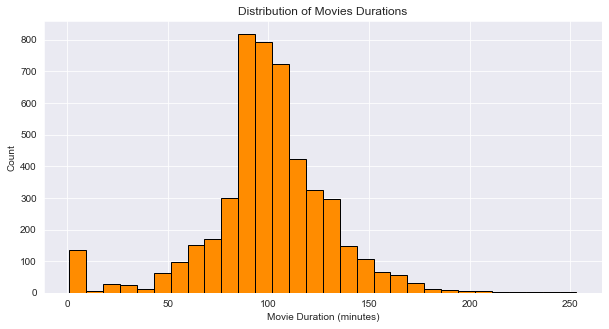

In [5]:
# Figure size
plt.figure(figsize=(10, 5))

# Histogram of movie duration
plt.hist(netflix_data["duration"], bins=30, color="darkorange", edgecolor="black")
plt.xlabel("Movie Duration (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Movies Durations")

# Show plot
plt.show()

#### Interpretion:
- **Most movies** are between **80–120 minutes**, with a peak around **100 minutes**.

- **Right-skewed distribution**: A few movies exceed **150 minutes**, but they are uncommon.

- **Short films** under **30 minutes**, may include documentaries or animated content.

**Key Takeaway**:
Netflix movies generally follow standard runtime norms, with a small portion of very short or long films.

#### 2.2.3 Boxplot for `duration`

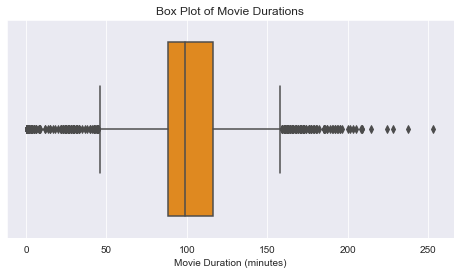

In [6]:
# Figure size
plt.figure(figsize=(8,4))

# Boxplot of movie duration
sns.boxplot(netflix_data['duration'], color='darkorange')
plt.xlabel("Movie Duration (minutes)")
plt.title("Box Plot of Movie Durations")

# Show plot
plt.show()

#### Interpretion:

- **Most movies** fall between 80–120 minutes, with a median close to 100 minutes.

- **Outliers**: Movies under **50 minutes and over 150 minutes** are outliers.

- **Right-skewed distribution**: A few extreme values exceed **200 minutes**, indicating very long films.

This aligns with the histogram, confirming that most movies follow standard runtimes, with a few significantly shorter or longer ones.

## 3. Exploring the Research Questions

To answer our research questions effectively, we first need to **focus on movies from the 1990s** by:

- **Subsetting the dataset** to include only movies (excluding other types like TV shows).

- **Filtering the movies dataset** to include only those released between **1990 and 1999**.

Once we have the relevant data, we can proceed with targeted analysis for each research question.

In [7]:
# Subset the dataset to include only movies
movie_only = netflix_data[netflix_data["type"] == "Movie"]

# Filter for movies released in the 1990s (1990–1999)
movie_1990s = movie_only[(movie_only["release_year"] >= 1990) & (movie_only["release_year"] < 2000)]

# Display the first few rows of the filtered dataset
movie_1990s.head() # Expecting only movies from 1990–1999


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


### 3.1 Checking the `movie_1990s` Dataset

In [8]:
# Check the number of rows and columns
print(movie_1990s.shape)

# Verify unique release years to ensure only 1990s movies are included
movie_1990s["release_year"].unique()

(183, 11)


array([1997, 1993, 1998, 1996, 1990, 1999, 1991, 1994, 1995, 1992],
      dtype=int64)

#### Interpretation:

- The dataset contains **183 movies** from the **1990s**, spanning **1992 to 1997**.

- This confirms our filtering was successful.

Now, let’s dive into answering our research questions! 

### 3.2 Answering  the Research Questions

#### 3.2.1 What was the most frequent movie duration in the 1990s?

 The most frequent movie duration in the 1990s was 94 minutes


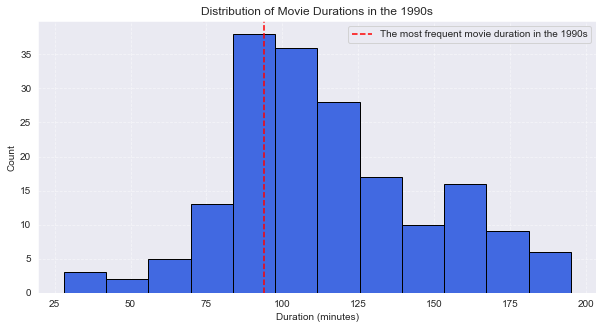

In [9]:
# Find the most frequent movie duration in the 1990s
frequent_duration = movie_1990s["duration"].mode()[0]

# Print the output
print(f" The most frequent movie duration in the 1990s was {frequent_duration} minutes")

# Visualize with histogram
plt.figure(figsize=(10, 5))
plt.hist(movie_1990s["duration"], bins="auto", color="royalblue", edgecolor="black")
plt.axvline(frequent_duration, color="red", linestyle="--", label="The most frequent movie duration in the 1990s")
plt.grid(True, linestyle="--", alpha=0.5)
plt.title("Distribution of Movie Durations in the 1990s")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.legend()

# Show plot
plt.show()

#### Interpretation:

The most frequent movie duration in the 1990s was **94 minutes**, as shown by the histogram. This indicates that most films followed a standard runtime, aligning with industry norms of the time.

#### 3.2.2 How many action movies in the 1990s had a duration of less than 90 minutes?


In [10]:
# Subset the dataset to include only action movies
action_movie = movie_1990s[movie_1990s["genre"] == "Action"]

# Count action movies with duration < 90 minutes
short_action_movie = (action_movie["duration"] < 90).sum()

# Display the result
print(f"Number of action movies in the 1990s with duration less than 90 minutes: {short_action_movie}")


Number of action movies in the 1990s with duration less than 90 minutes: 7


#### 3.2.3 What were the most popular genres and who were the most prolific directors?



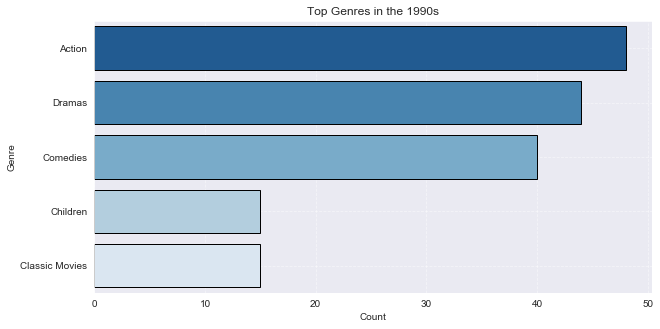

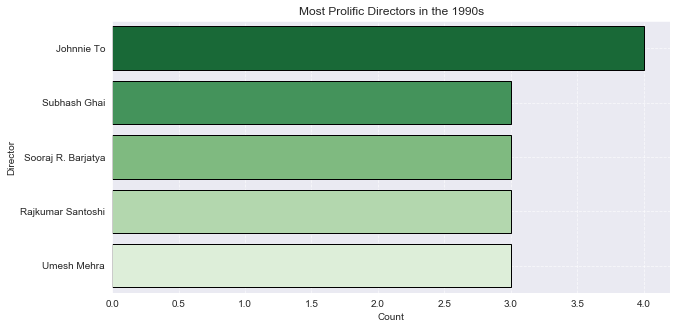

In [11]:
# Most popular genres
top_genres = movie_1990s["genre"].value_counts().head()

# Most prolific directors
top_directors = movie_1990s["director"].value_counts().head()

# Set style
sns.set_style("darkgrid")

# Plot top genres
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="Blues_r", edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top Genres in the 1990s")
plt.show()

# Plot top directors
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="Greens_r", edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Count")
plt.ylabel("Director")
plt.title("Most Prolific Directors in the 1990s")
plt.show()

#### Interpretation:
The bar charts highlight key trends in **1990s cinema**:  

- **Top Genres:** Action, Drama, and Comedies dominated, with **Action** being the most popular.  
- **Most Prolific Directors:** **Johnnie To** directed the most movies, followed by **Youssef Chahine and Umesh Mehra**.  

This suggests a strong audience preference for **thrilling and dramatic storytelling**, while a few directors were notably productive in shaping the decade’s film landscape.

#### 3.2.4 Which countries produced the most movies during this period?



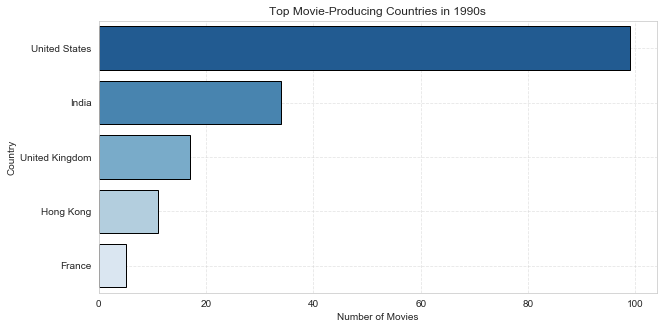

In [12]:
# Top producing countries 
top_countries = movie_1990s["country"].value_counts().head()

# Convert top_countries into DataFrame and rename columns
top_countries = top_countries.reset_index()  
top_countries.columns = ["Country", "Count"]  

# Set style
sns.set_style("whitegrid")

# Visualize the distribution
plt.figure(figsize=(10, 5))
sns.barplot(data=top_countries, x="Count", y="Country", palette="Blues_r", edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.5)
plt.title("Top Movie-Producing Countries in 1990s")
plt.xlabel("Number of Movies")
plt.ylabel("Country")

# Show plot
plt.show()

#### Interpretation:

The bar chart illustrates the **top five movie-producing countries in the 1990s**. The **United States** dominated the industry with the highest number of movies, followed by **India** and the **United Kingdom**, which had significantly lower production numbers. **Hong Kong and France** also contributed, but at a much smaller scale.  

This highlights the **key players in the global film industry** during the decade.

#### 3.2.5 Did movie durations increase or decrease over time?


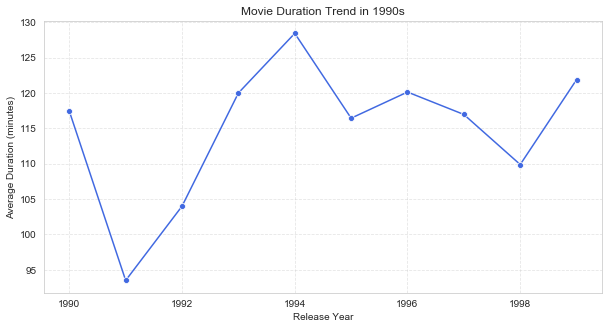

In [13]:
# Calculate the average duration of each year
yearly_average_duration = movie_1990s.groupby("release_year")["duration"].mean()

# Set style
sns.set_style("whitegrid")

# Visualize the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_average_duration.index, y=yearly_average_duration.values, marker="o", color="royalblue")
#plt.plot(yearly_average_duration, color="darkorange", marker="o", marker_color="darkorange", linestyle="-")
plt.title("Movie Duration Trend in 1990s")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

#### Interpretation:
The line chart shows the **trend in average movie duration throughout the 1990s**, with no consistent increase or decrease.  

- **1991 Drop:** A **sharp decline** brought durations to around **95 minutes**.  
- **1992-1994 Rise:** A steady increase peaked at **130 minutes in 1994**.  
- **1995-1999 Fluctuations:** Durations varied, reaching a low in **1998** before rising slightly in **1999**.  

Overall, movie durations **fluctuated rather than following a clear trend**, with some years favoring shorter films and others longer ones.



## 4. Key Findings

#### 1. Most Frequent Movie Duration  
The most frequent movie duration in the 1990s was **94 minutes**, as indicated by the histogram. This suggests that most movies during this period followed a **standard runtime**, aligning with industry norms.  

#### 2. Action Movies Under 90 Minutes  
A total of **7 action movies** in the 1990s had a duration of less than **90 minutes**, indicating that most action films tended to be longer.  

#### 3. Most Popular Genres & Prolific Directors  
- **Top Genres:** Action, Drama, and Comedies dominated, with **Action** being the most popular.  
- **Most Prolific Directors:** **Johnnie To** directed the most movies, followed by **Youssef Chahine** and **Umesh Mehra**.  
This suggests a **strong audience preference for thrilling and dramatic storytelling**, while a few directors played a key role in shaping 1990s cinema.  

#### 4. Top Movie-Producing Countries  
The United States **dominated** the industry with the highest number of movies, followed by **India and the United Kingdom**, which had significantly lower production numbers. **Hong Kong and France** also contributed but at a much smaller scale. This highlights the **key players in the global film industry** during the decade.  

#### 5. Movie Duration Trend Over Time 
Movie durations in the 1990s **did not follow a consistent increasing or decreasing trend** but fluctuated:  
- **1991 saw a sharp drop** to around **95 minutes**.  
- **1992-1994 showed a steady rise**, peaking at **130 minutes** in 1994.  
- **1995-1999 exhibited fluctuations**, with a dip in **1998** before a slight rebound in **1999**.  
This suggests that while some years favored shorter films, others leaned toward longer runtimes, reflecting diverse storytelling approaches in the decade.

## 5. Conclusion 

The analysis of Netflix's 1990s movie catalog highlights key trends in film production, audience preferences, and industry dynamics during the decade.  

- **Genre Dominance:** **Action** emerged as the most popular genre, followed by **Drama** and **Comedy**, reflecting audience preferences for high-energy and emotionally compelling storytelling.  

- **Leading Movie-Producing Countries:** The **United States** led in film production, followed by **India** and the **United Kingdom**, reinforcing Hollywood’s dominant role in the global film industry.

- **Most Prolific Directors:** **Johnnie To**, a Hong Kong filmmaker, directed the most movies in the dataset, highlighting the influence of Asian cinema in the 1990s.  

- **Movie Duration Trends:** Film durations fluctuated throughout the decade, with no clear increasing or decreasing trend, suggesting that runtime decisions were content-driven rather than dictated by industry standards.  

This exploratory data analysis (EDA) provides valuable insights into 1990s cinema and raises interesting questions for future research. 

 - **Did these trends persist into the 21st century?** 
 - **How have audience preferences evolved over time?** 

Further studies could incorporate **machine learning techniques to predict genre trends, analyze streaming-era preferences, or assess the impact of globalization on film production.**  

This study not only offers a snapshot of 1990s filmmaking but also sets the stage for deeper investigations into the evolution of the global movie industry.